In [2]:
import pandas as pd 
import pyodbc 
import numpy as np
import os

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from pathlib import Path
import pandas as pd

# Définir le chemin vers le dossier DATA
data_path = Path.cwd() / 'DATA'

# Charger les fichiers CSV
data = pd.read_csv(
    data_path / 'data.csv',
    dtype={
        "NoClient": str,
        "composite_key": str
    }
)

megdata = pd.read_csv(
    data_path / 'megdata.csv',
    dtype={
        "NoClient": str,
        "composite_key": str
    }
)

# Aperçu des fichiers
print("Aperçu de data :")
print(data.head())

print("\nAperçu de megdata :")
print(megdata.head())


Aperçu de data :
      ID         CrmName     RefDate AutoCloseDate NoClient code_naf  \
0  23284  MIS-2016-12-01  2016-12-31    2023-11-30    03617    4312A   
1  24786  MIS-2017-12-01  2017-12-31    2023-11-30    03617    4312A   
2  25010  MIS-2017-12-01  2017-12-31    2024-06-30    05185    6820B   
3  26555  MIS-2018-12-01  2018-12-31    2020-05-27    05103    4638B   
4  28006  MIS-2019-12-01  2019-12-31    2020-12-08    02631    4511Z   

  composite_key  temps_code1  temps_code3  temps_code4  ...  forme_juridique  \
0     201603617         0.00         0.70          2.0  ...             SARL   
1     201703617         0.00         0.35          0.0  ...             SARL   
2     201705185         0.00         1.35          0.0  ...              SCI   
3     201805103         0.00         1.00          0.0  ...              SAS   
4     201902631         5.75         1.92          0.0  ...              IND   

                                            activite  premiere_date_s

In [ ]:
import pandas as pd
from pathlib import Path

# Charger les données
data_path = Path.cwd() / 'DATA'
data = pd.read_csv(data_path / 'data.csv', dtype={"NoClient": str})
megdata_raw = pd.read_csv(data_path / 'megdata.csv', sep=';', dtype=str)

# Nettoyage et transformation de megdata
megdata_raw.columns = ['NoClient', 'creation_date']
megdata_raw['year_created'] = pd.to_datetime(megdata_raw['creation_date'], errors='coerce').dt.year
megdata = megdata_raw.dropna(subset=['NoClient', 'year_created'])

# S'assurer que NoClient est une string et année un int
megdata['NoClient'] = megdata['NoClient'].astype(str)
megdata['year_created'] = megdata['year_created'].astype(int)

# Générer les années de 2012 à 2024
years = list(range(2012, 2025))

# Créer une table vide pour l’indicateur
clients = pd.Series(pd.concat([data['NoClient'], megdata['NoClient']]).unique(), name='NoClient')
final_df = pd.DataFrame({'NoClient': clients})

for year in years:
    final_df[str(year)] = 0  # par défaut 0

# Marquer 1 pour les clients megdata à partir de l’année de création
for _, row in megdata.iterrows():
    client = row['NoClient']
    year_created = row['year_created']
    for year in years:
        if year >= year_created:
            final_df.loc[final_df['NoClient'] == client, str(year)] = 1

# Afficher un aperçu du résultat
print(final_df.head())


C:\Users\Z35\AppData\Local\Temp\ipykernel_15940\407815480.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  megdata['NoClient'] = megdata['NoClient'].astype(str)
C:\Users\Z35\AppData\Local\Temp\ipykernel_15940\407815480.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  megdata['year_created'] = megdata['year_created'].astype(int)


    NoClient  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  \
0      03617     0     0     0     0     0     0     0     0     0     0   
1      05185     0     0     0     0     0     0     0     0     0     0   
2      05103     0     0     0     0     0     0     0     0     0     0   
3      02631     0     0     0     0     0     0     0     0     0     0   
4      02935     0     0     0     0     0     0     0     0     0     0   
..       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
495    05572     0     0     0     0     0     0     0     0     0     0   
496    05573     0     0     0     0     0     0     0     0     0     0   
497    05574     0     0     0     0     0     0     0     0     0     0   
498    05577     0     0     0     0     0     0     0     0     0     0   
499    05580     0     0     0     0     1     1     1     1     1     1   

     2022  2023  2024  
0       0     0     0  
1       0     0     0  
2       0     0

In [10]:
import pandas as pd
from pathlib import Path

# 1. Définir le chemin
data_path = Path.cwd() / 'DATA'

# 2. Charger les fichiers
data = pd.read_csv(data_path / 'data.csv', dtype={"NoClient": str})
megdata_raw = pd.read_csv(data_path / 'megdata.csv', sep=';', dtype=str)

# 3. Nettoyer megdata
megdata_raw.columns = ['NoClient', 'creation_date']
megdata_raw['year_created'] = pd.to_datetime(megdata_raw['creation_date'], errors='coerce').dt.year
megdata = megdata_raw.dropna(subset=['NoClient', 'year_created'])
megdata['NoClient'] = megdata['NoClient'].astype(str)
megdata['year_created'] = megdata['year_created'].astype(int)

# 4. Créer le tableau de 0/1 pour chaque client et chaque année de 2012 à 2024
annees = list(range(2012, 2025))
clients = data['NoClient'].unique()

records = []
for client in clients:
    creation = megdata.loc[megdata['NoClient'] == client, 'year_created']
    if not creation.empty:
        year = creation.values[0]
    else:
        year = 3000  # valeur fictive future => tout restera à 0
    presence = {str(a): int(a >= year) for a in annees}
    presence['NoClient'] = client
    records.append(presence)

# 5. Créer le DataFrame
basemeg0_1 = pd.DataFrame(records)

# 6. Fusionner avec la base `data`
data_combinee = pd.merge(data, basemeg0_1, on='NoClient', how='left')

# 7. Enregistrer la base complète
data_combinee.to_csv(data_path / 'basemeg0_1.csv', index=False)

print("✅ Fichier enregistré sous 'basemeg0_1.csv' dans le dossier DATA.")


C:\Users\Z35\AppData\Local\Temp\ipykernel_15940\3203378757.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  megdata['NoClient'] = megdata['NoClient'].astype(str)
C:\Users\Z35\AppData\Local\Temp\ipykernel_15940\3203378757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  megdata['year_created'] = megdata['year_created'].astype(int)


✅ Fichier enregistré sous 'basemeg0_1.csv' dans le dossier DATA.


In [12]:

print(data_combinee.head(700))


        ID         CrmName     RefDate AutoCloseDate NoClient code_naf  \
0    23284  MIS-2016-12-01  2016-12-31    2023-11-30    03617    4312A   
1    24786  MIS-2017-12-01  2017-12-31    2023-11-30    03617    4312A   
2    25010  MIS-2017-12-01  2017-12-31    2024-06-30    05185    6820B   
3    26555  MIS-2018-12-01  2018-12-31    2020-05-27    05103    4638B   
4    28006  MIS-2019-12-01  2019-12-31    2020-12-08    02631    4511Z   
..     ...             ...         ...           ...      ...      ...   
695  29591  MIS-2020-10-01  2020-10-31    2021-01-31    06408    4941B   
696  30274  MIS-2020-12-01  2020-12-31    2021-04-09    06411    8690d   
697  30275  MIS-2020-12-01  2020-12-31    2023-11-30    06412    4762Z   
698  30277  MIS-2020-12-01  2020-12-31    2021-04-30    06414    4719B   
699  30278  MIS-2020-12-01  2020-12-31    2021-06-08    06415    6622Z   

     composite_key  temps_code1  temps_code3  temps_code4  ...  2015  2016  \
0        201603617         0.00  

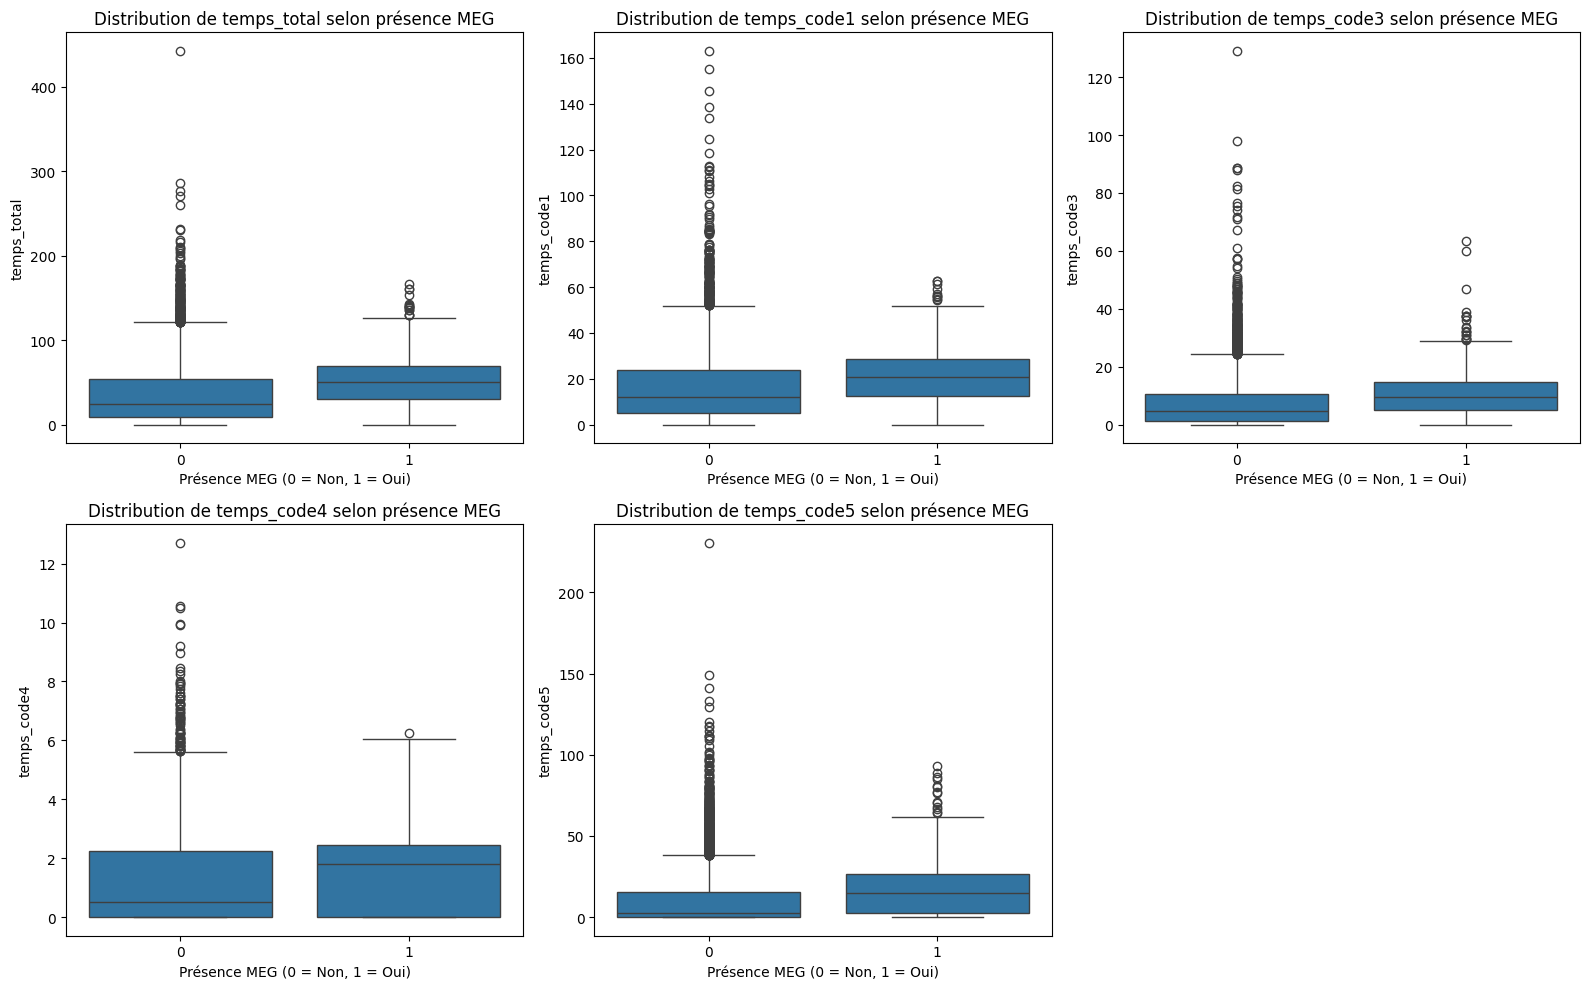


Régression linéaire : temps_total ~ presence_meg
                            OLS Regression Results                            
Dep. Variable:            temps_total   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.43e-24
Time:                        15:39:09   Log-Likelihood:                -34747.
No. Observations:                6985   AIC:                         6.950e+04
Df Residuals:                    6983   BIC:                         6.951e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path

# Charger les données
data_path = Path.cwd() / 'DATA'
df = pd.read_csv(data_path / 'basemeg0_1.csv', dtype={"NoClient": str})

# Calculer presence_meg (nombre d'années dans meg)
annees = [str(y) for y in range(2012, 2025)]
df['presence_meg'] = (df[annees].sum(axis=1) > 0).astype(int)  # 0 = jamais dans meg, 1 = au moins 1 an

# Calcul temps_total
df['temps_total'] = df[['temps_code1', 'temps_code3', 'temps_code4', 'temps_code5']].sum(axis=1)

temps_vars = ['temps_total', 'temps_code1', 'temps_code3', 'temps_code4', 'temps_code5']

plt.figure(figsize=(16, 10))

for i, var in enumerate(temps_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='presence_meg', y=var, data=df)
    plt.title(f'Distribution de {var} selon présence MEG')
    plt.xlabel('Présence MEG (0 = Non, 1 = Oui)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Régressions linéaires simples
def regression_lin(y_var):
    X = df[['presence_meg']]
    X = sm.add_constant(X)
    y = df[y_var]
    model = sm.OLS(y, X).fit()
    print(f"\nRégression linéaire : {y_var} ~ presence_meg")
    print(model.summary())

for var in temps_vars:
    regression_lin(var)


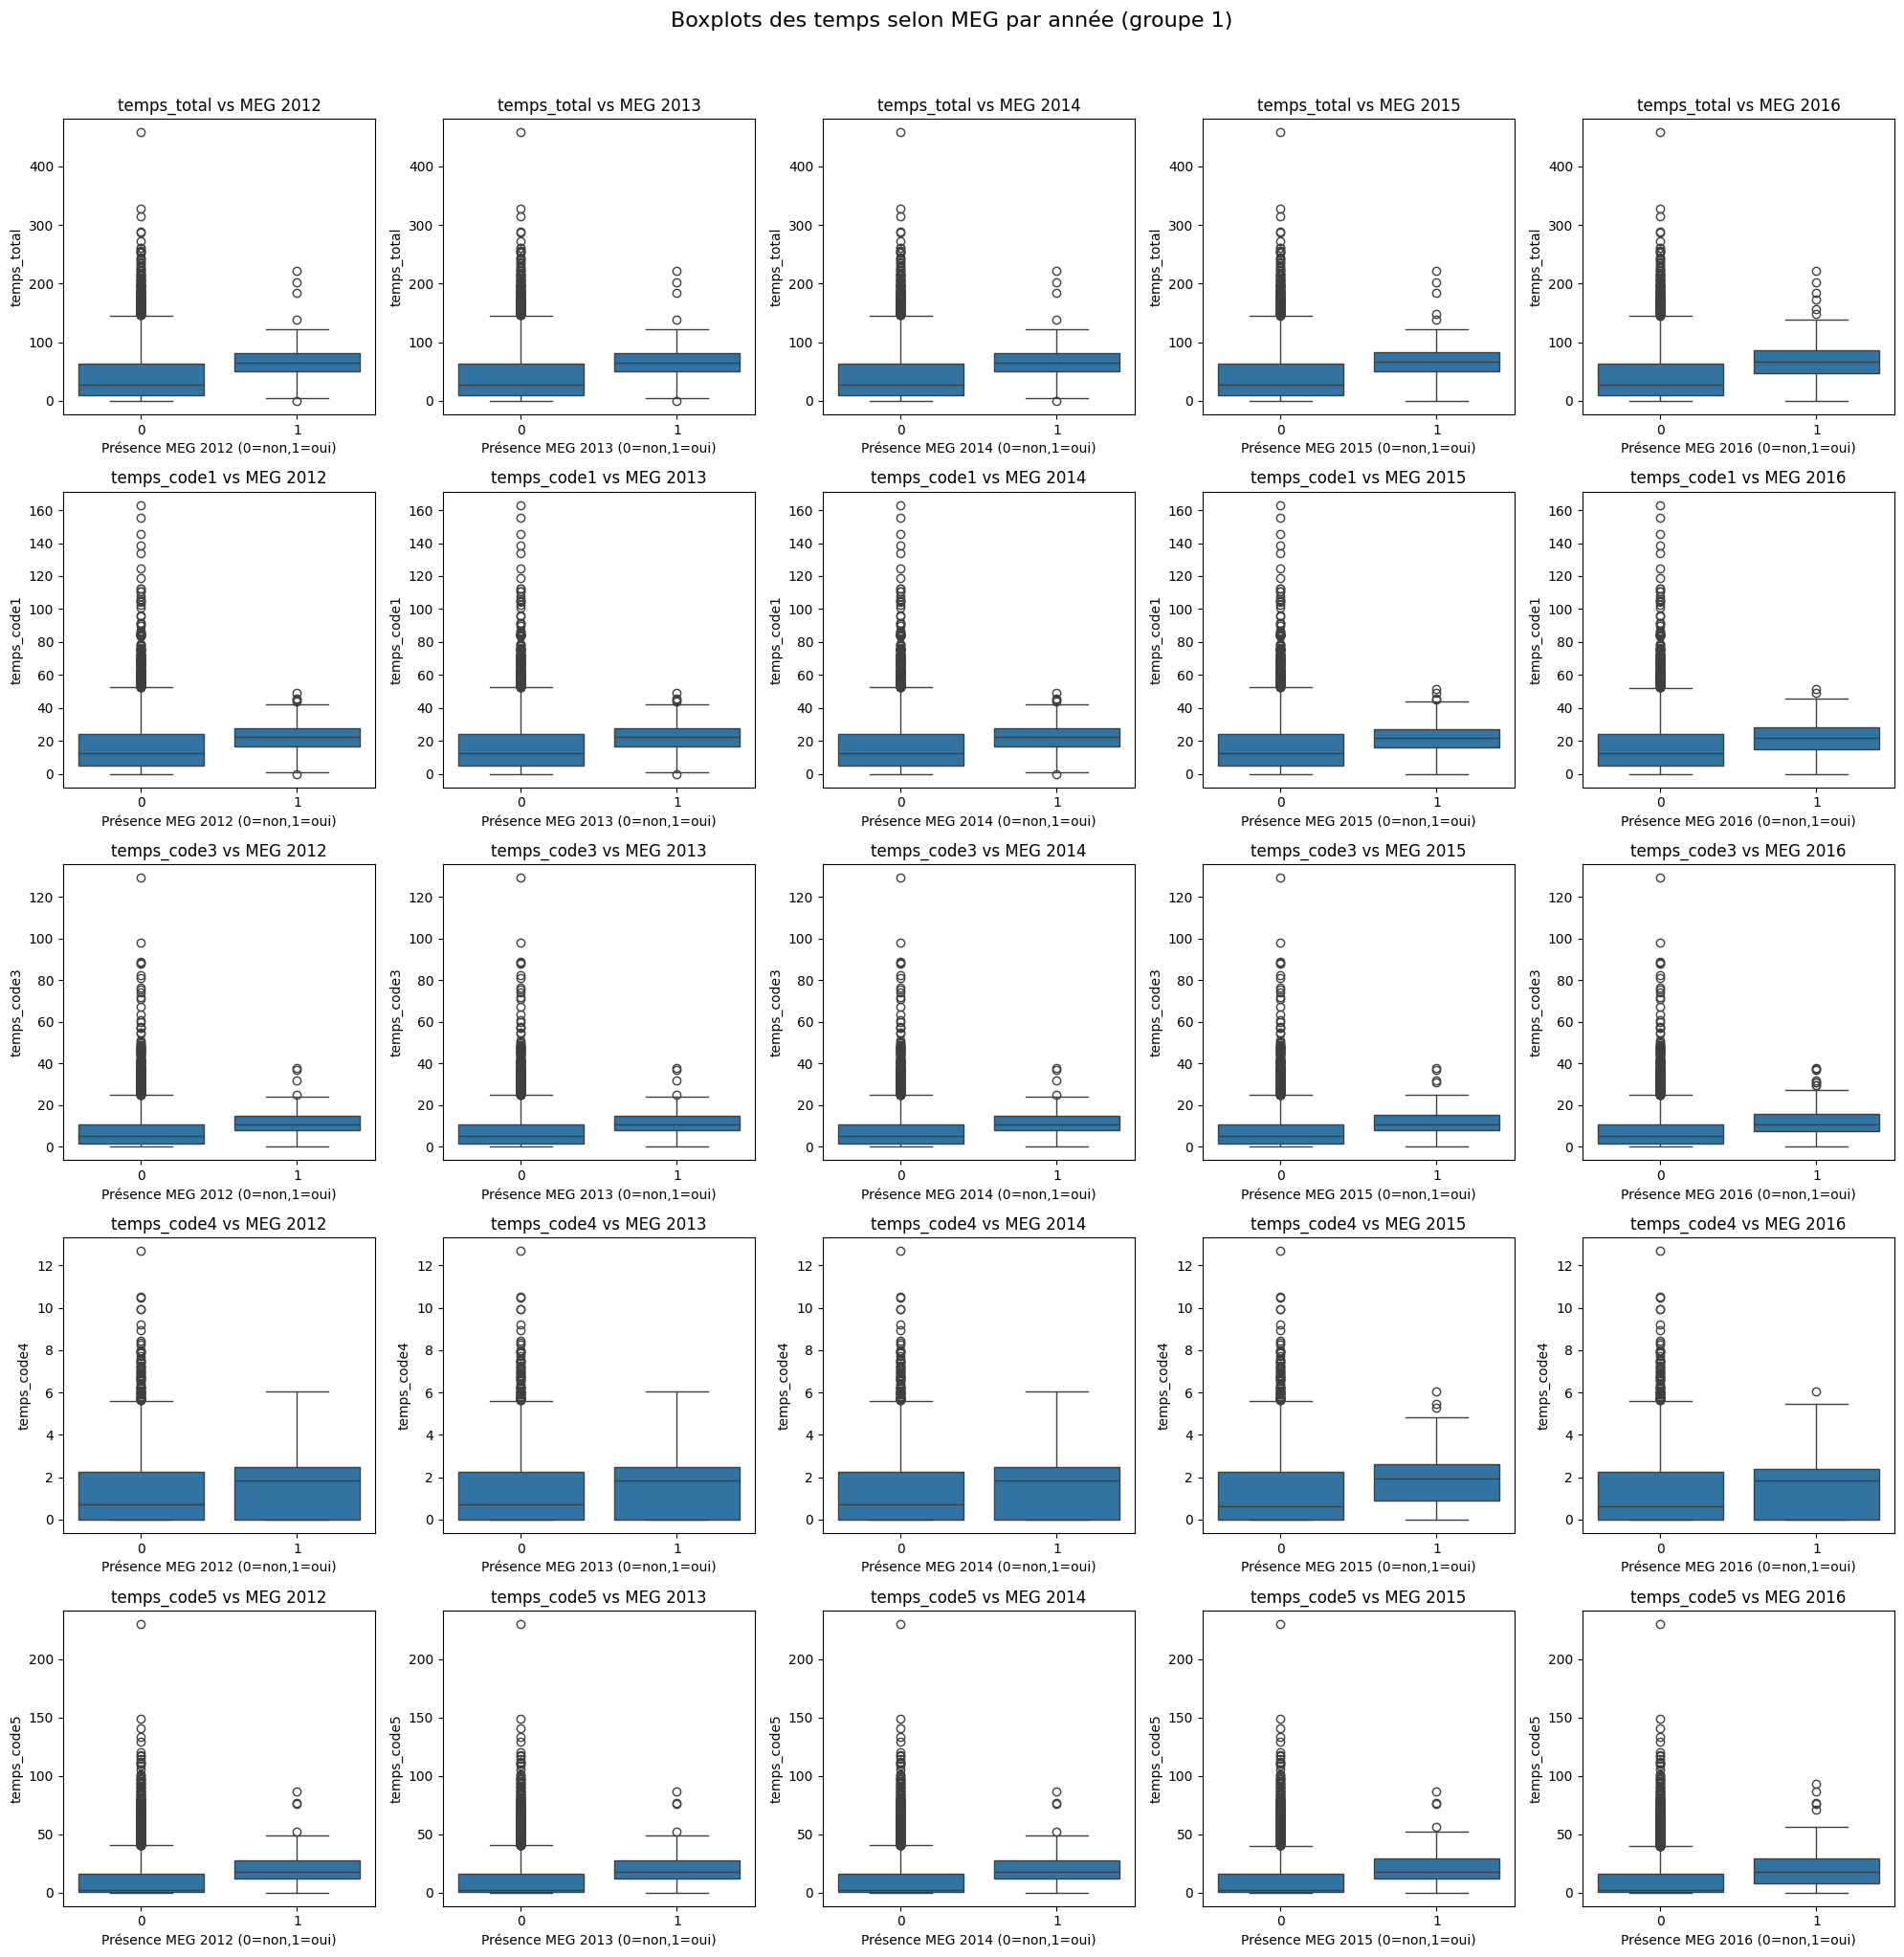

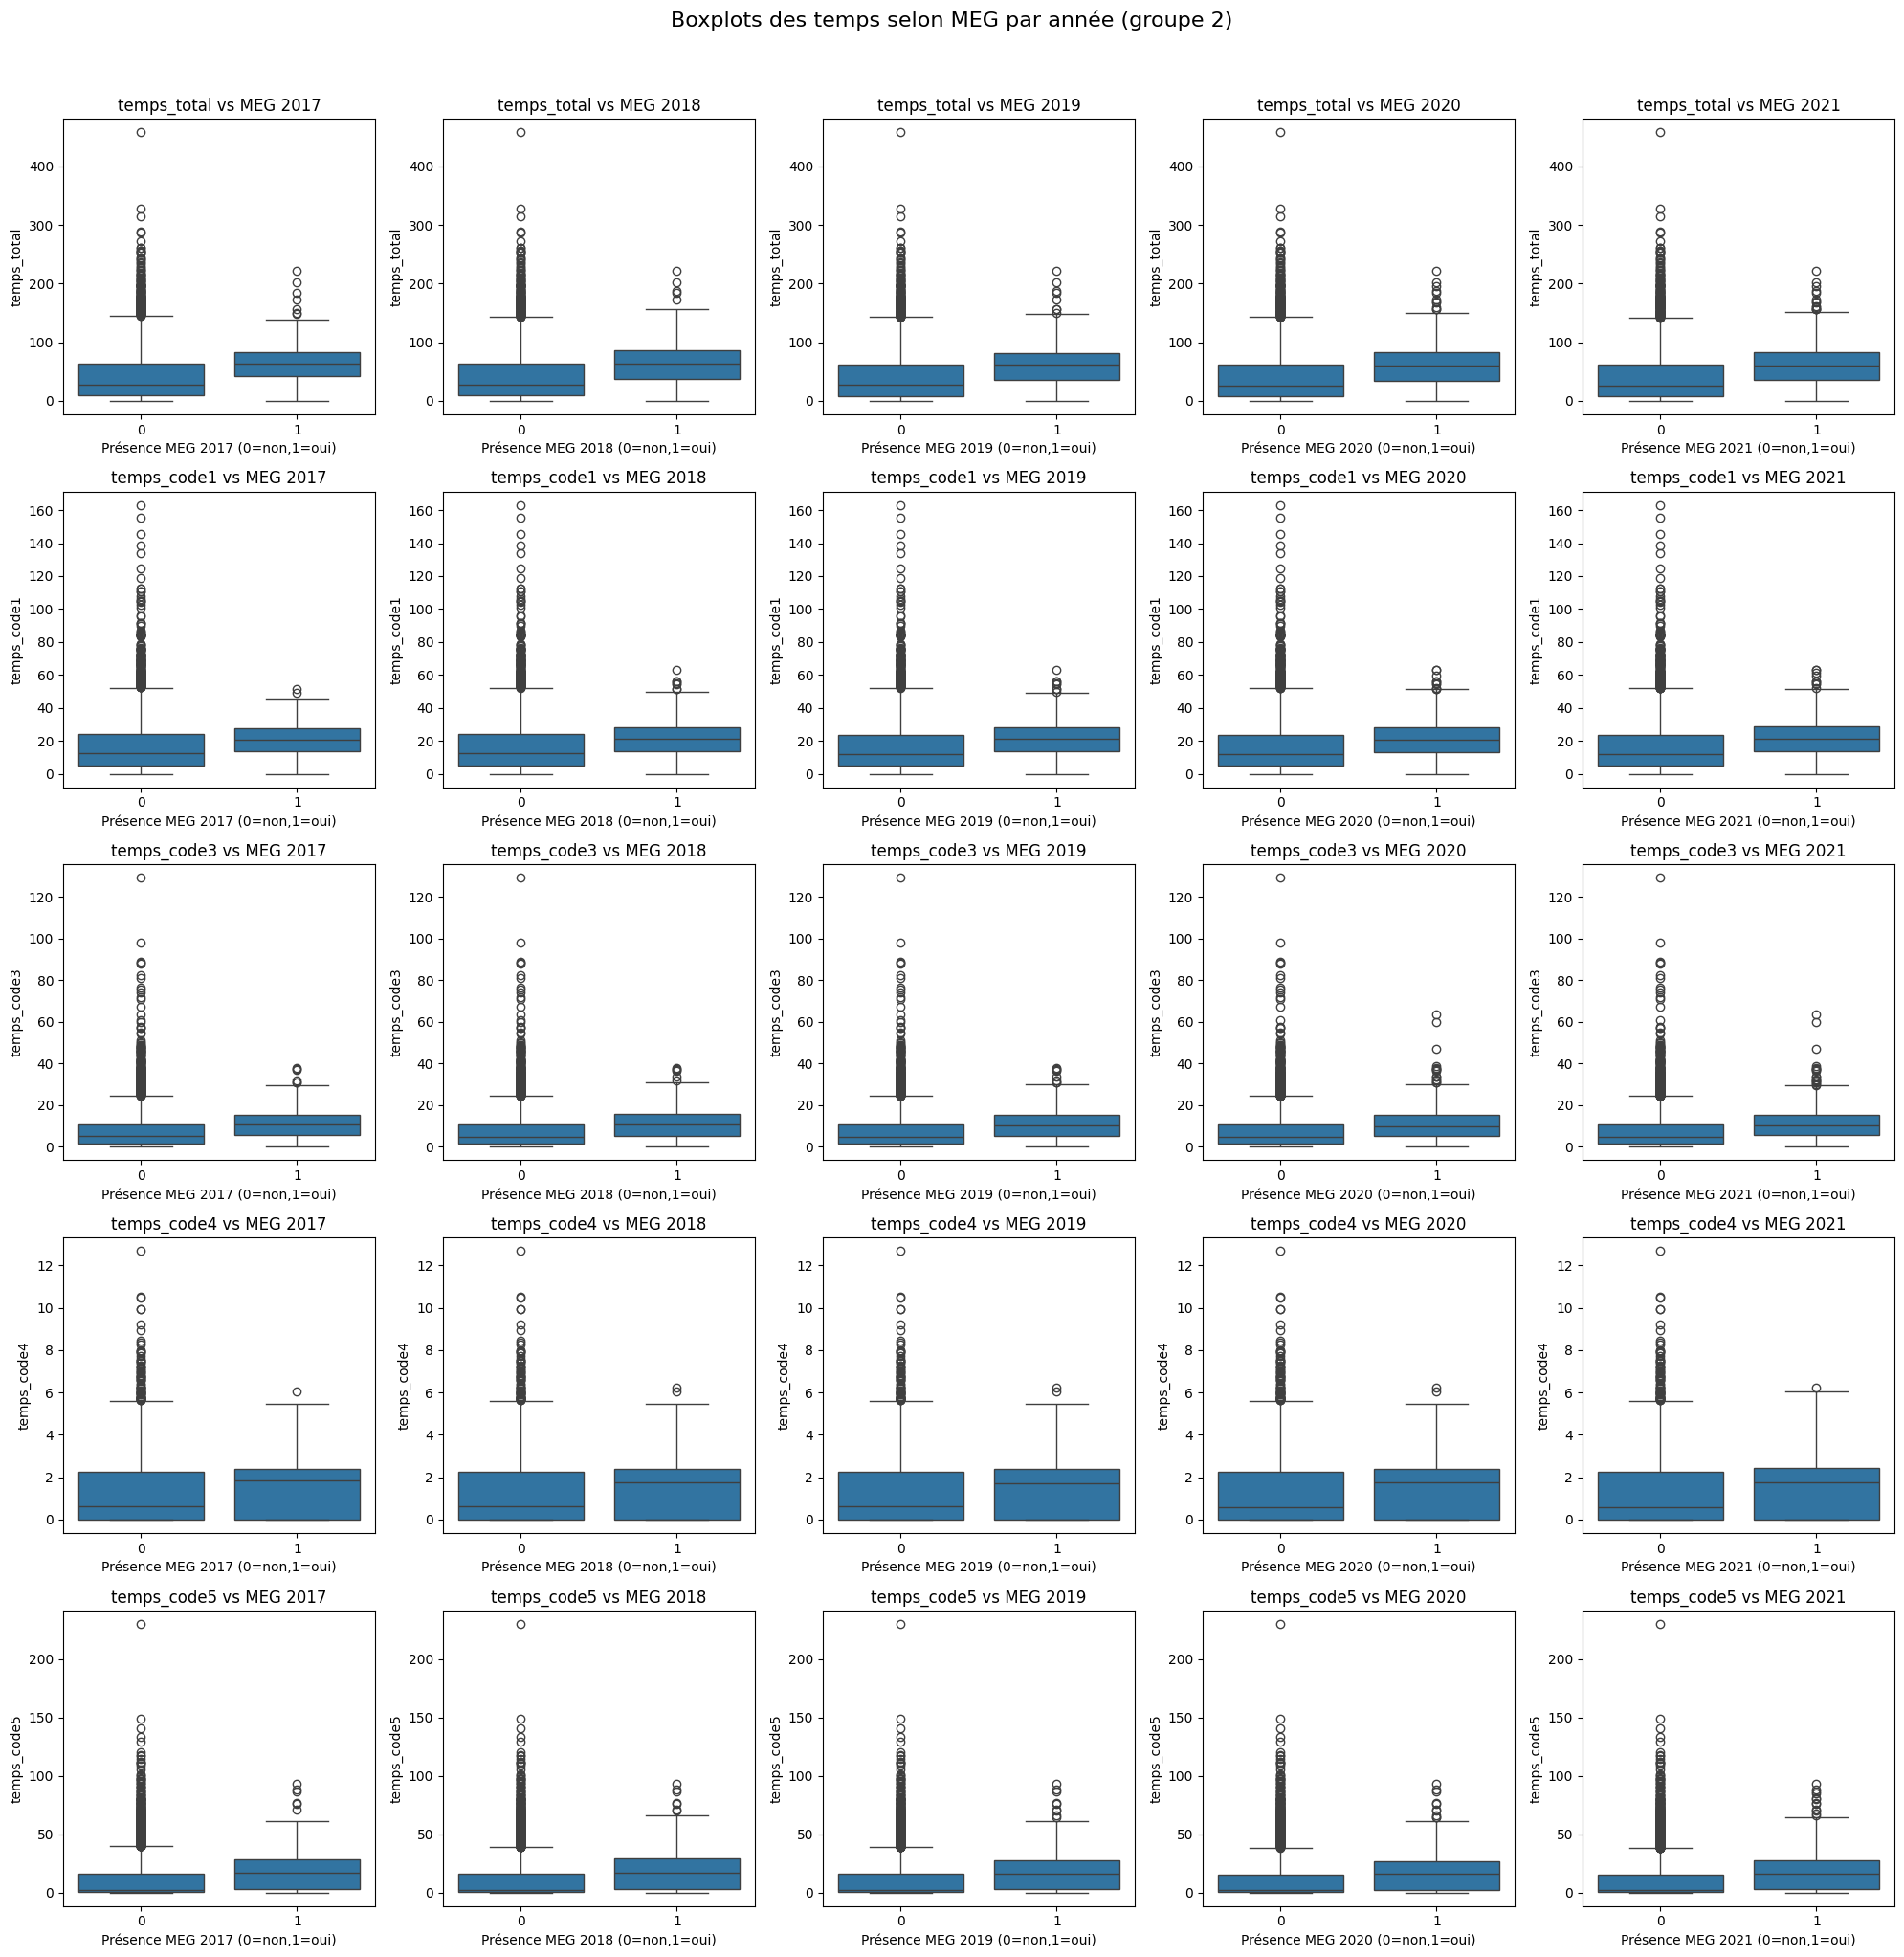

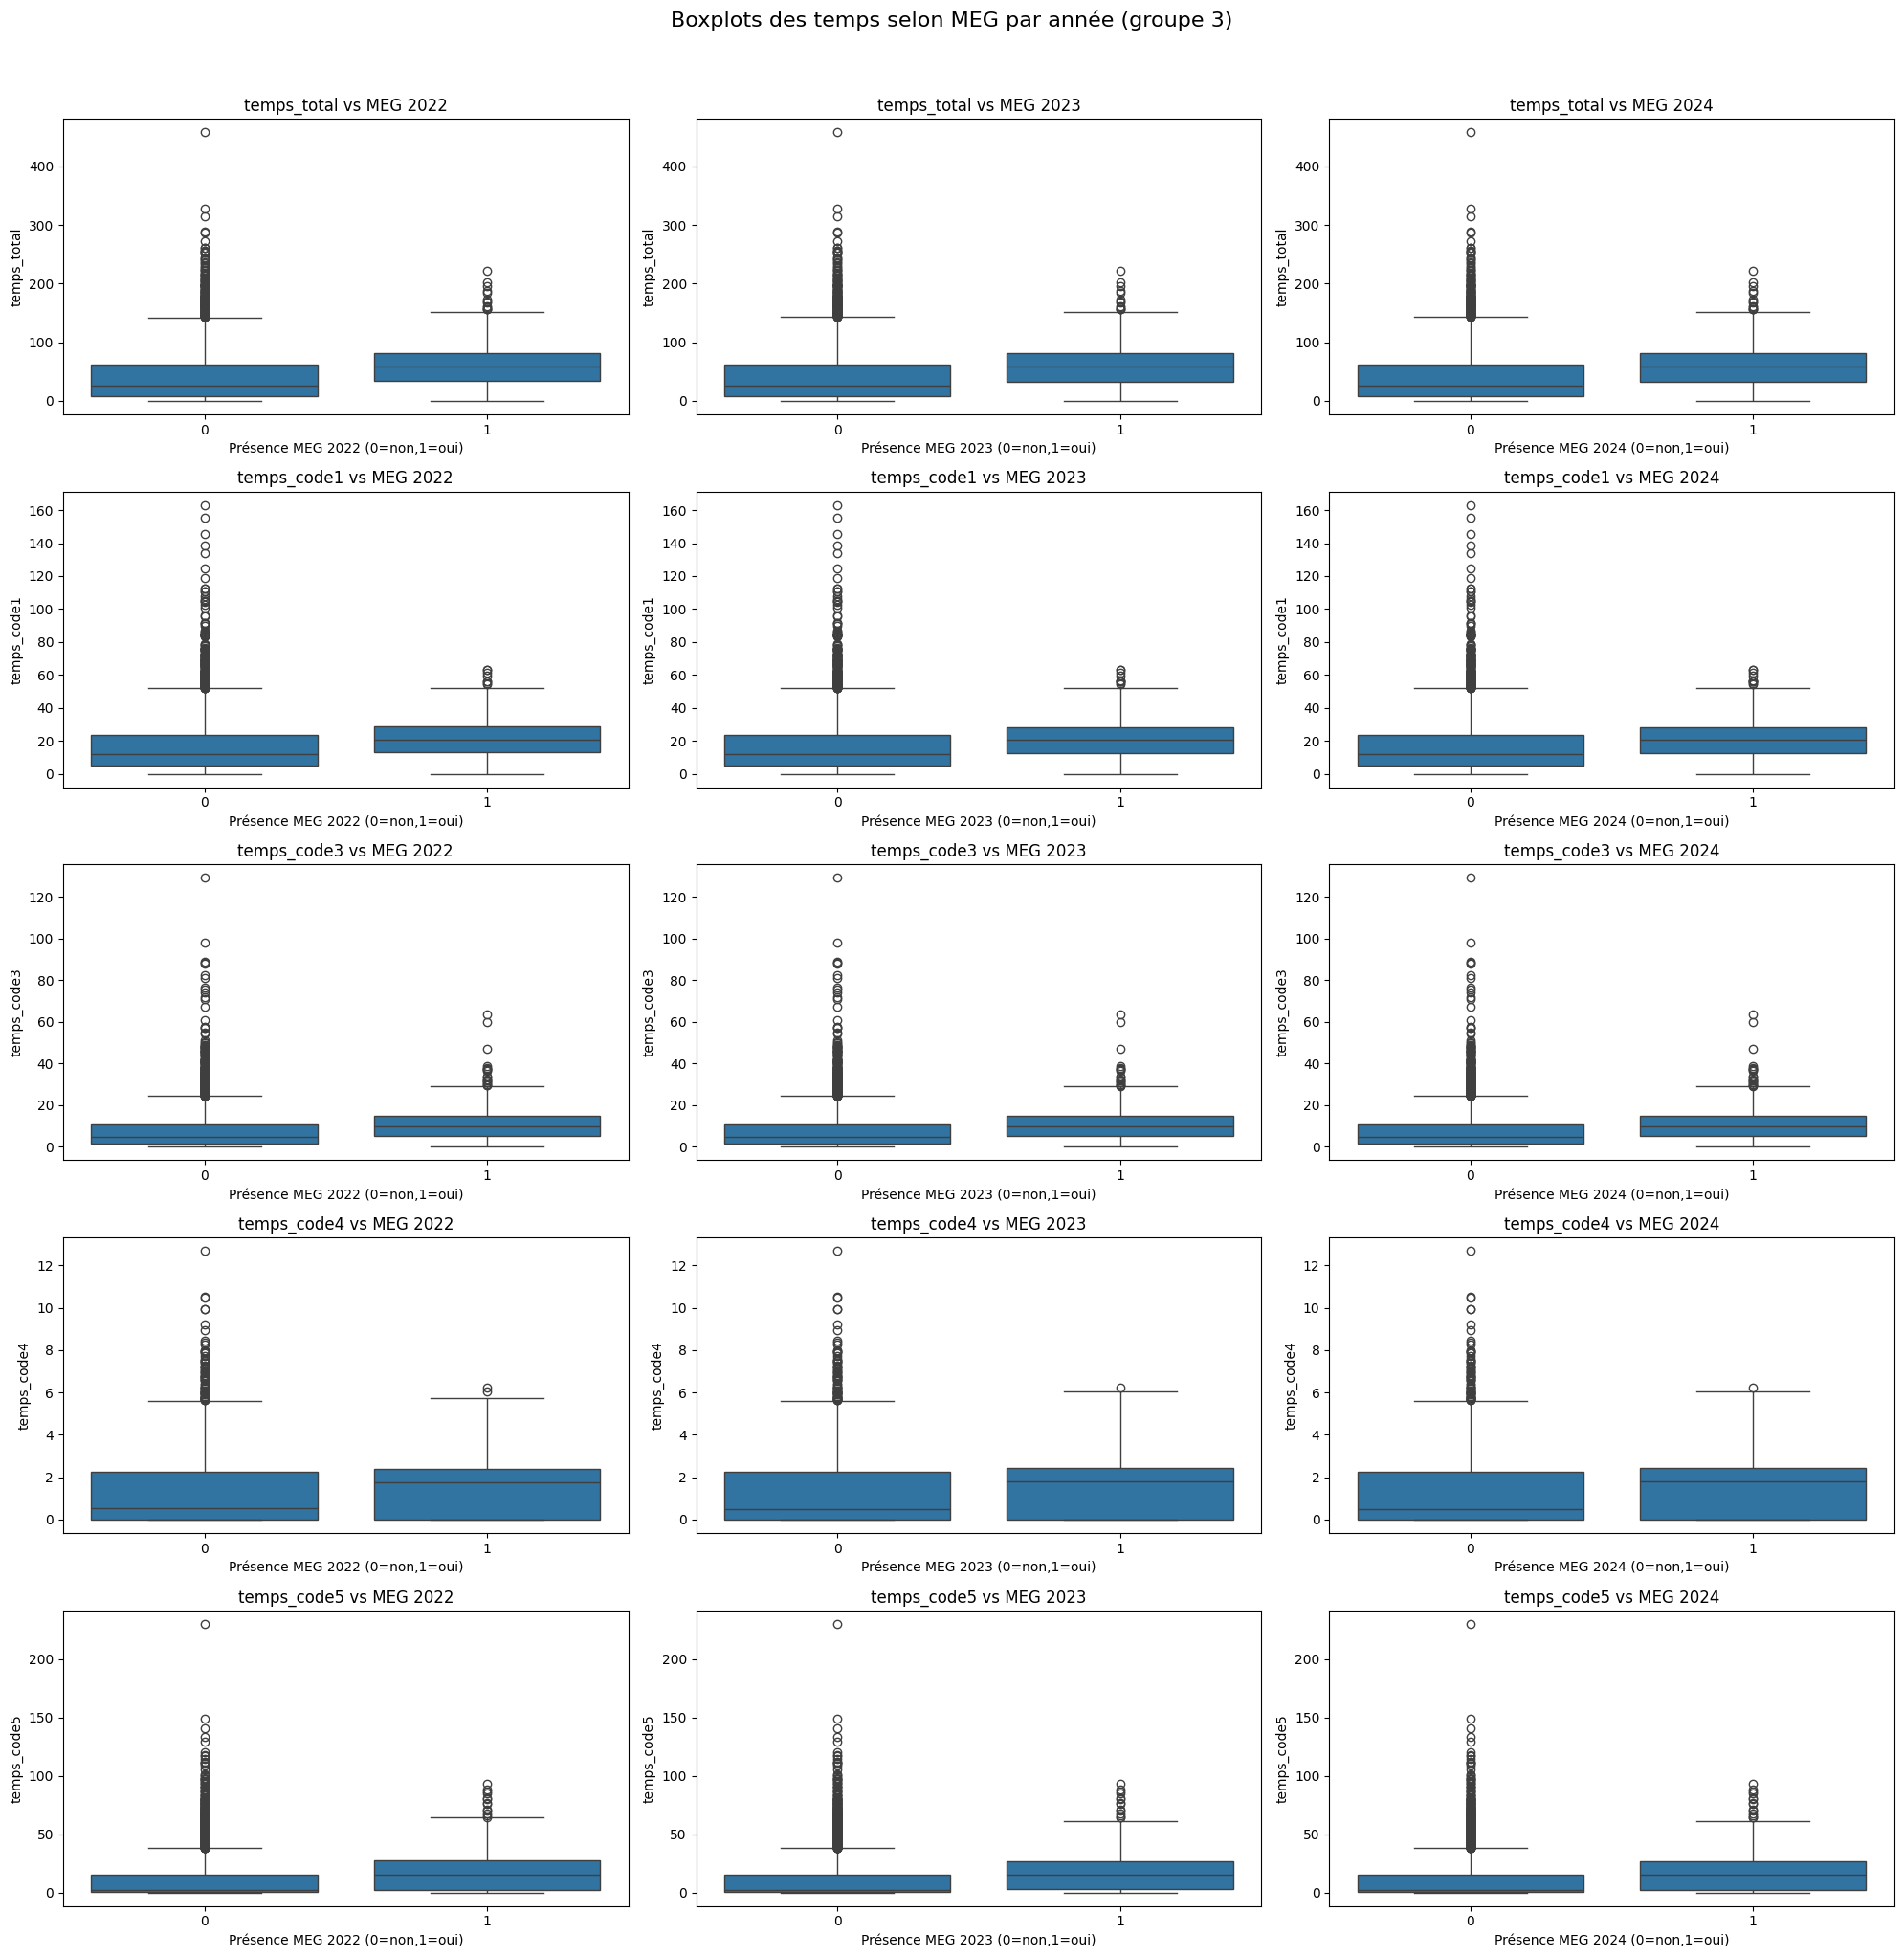

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Charger les données
data_path = Path.cwd() / 'DATA'
df = pd.read_csv(data_path / 'basemeg0_1.csv', dtype={"NoClient": str})

# Calcul presence_meg binaire (0 = jamais dans meg, 1 = au moins une année)
annees = [str(y) for y in range(2012, 2025)]
df['presence_meg'] = (df[annees].sum(axis=1) > 0).astype(int)

# Variables temps
temps_vars = ['temps_total', 'temps_code1', 'temps_code3', 'temps_code4', 'temps_code5']

# Pour chaque année, créer une colonne binaire présence MEG cette année (0/1)
for annee in annees:
    df[f'meg_{annee}'] = (df[annee] > 0).astype(int)

# Taille du plot
n_annees = len(annees)
n_vars = len(temps_vars)

# Pour gérer l'affichage, on fait des figures par bloc de 5 années
annees_groupes = [annees[i:i+5] for i in range(0, n_annees, 5)]

for g, groupe_annees in enumerate(annees_groupes, 1):
    plt.figure(figsize=(20, 4 * n_vars))
    
    for i, temps_var in enumerate(temps_vars):
        for j, annee in enumerate(groupe_annees):
            plt_idx = i * len(groupe_annees) + j + 1
            plt.subplot(n_vars, len(groupe_annees), plt_idx)
            sns.boxplot(x=f'meg_{annee}', y=temps_var, data=df)
            plt.title(f'{temps_var} vs MEG {annee}')
            plt.xlabel(f'Présence MEG {annee} (0=non,1=oui)')
            plt.ylabel(temps_var)
            plt.tight_layout()
    
    plt.suptitle(f'Boxplots des temps selon MEG par année (groupe {g})', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


In [20]:
import pandas as pd

# On charge la base complète avec toutes les colonnes
data_path = Path.cwd() / 'DATA'
df = pd.read_csv(data_path / 'basemeg0_1.csv', dtype={"NoClient": str})

# 1. On considère un client "dans MEG" s'il a presence_meg >= 1
df['presence_meg'] = df[[str(y) for y in range(2012, 2025)]].sum(axis=1)
df['in_meg'] = df['presence_meg'] > 0

# 2. Filtrer les clients dans MEG
df_meg = df[df['in_meg']]

# 3. Regrouper par code_naf et compter le nombre de clients
naf_counts = df_meg.groupby('code_naf').agg(
    nb_clients=('NoClient', 'nunique'),
    temps_moyen_total=('temps_total', 'mean'),
    activite=('activite', 'first')  # on récupère l'activité principale
).reset_index()

# 4. Trier par nombre de clients décroissant
naf_counts = naf_counts.sort_values(by='nb_clients', ascending=False)

print(naf_counts.head(20))  # Afficher les 20 premiers codes NAF avec leurs stats


   code_naf  nb_clients  temps_moyen_total  \
0     1071C          23          86.061882   
29    5610A          12          81.249539   
38    6820B           7          10.733182   
34    6201Z           5          48.869553   
13    4391A           5          61.904887   
54    8130Z           4          64.841053   
6     4321A           4          49.475275   
11    4332A           3          49.085330   
18    4520A           3          63.626667   
42    7022Z           3          24.617500   
35    6420Z           3          68.387000   
22    4673A           3          58.800000   
32    5630Z           2         110.420000   
24    4776Z           2          70.904286   
47    7311Z           2          70.173750   
17    4511Z           2          58.034286   
12    4333Z           2          83.316000   
26    4941A           2          37.368000   
23    4711B           2          67.600000   
30    5610C           2          47.380000   

                                 

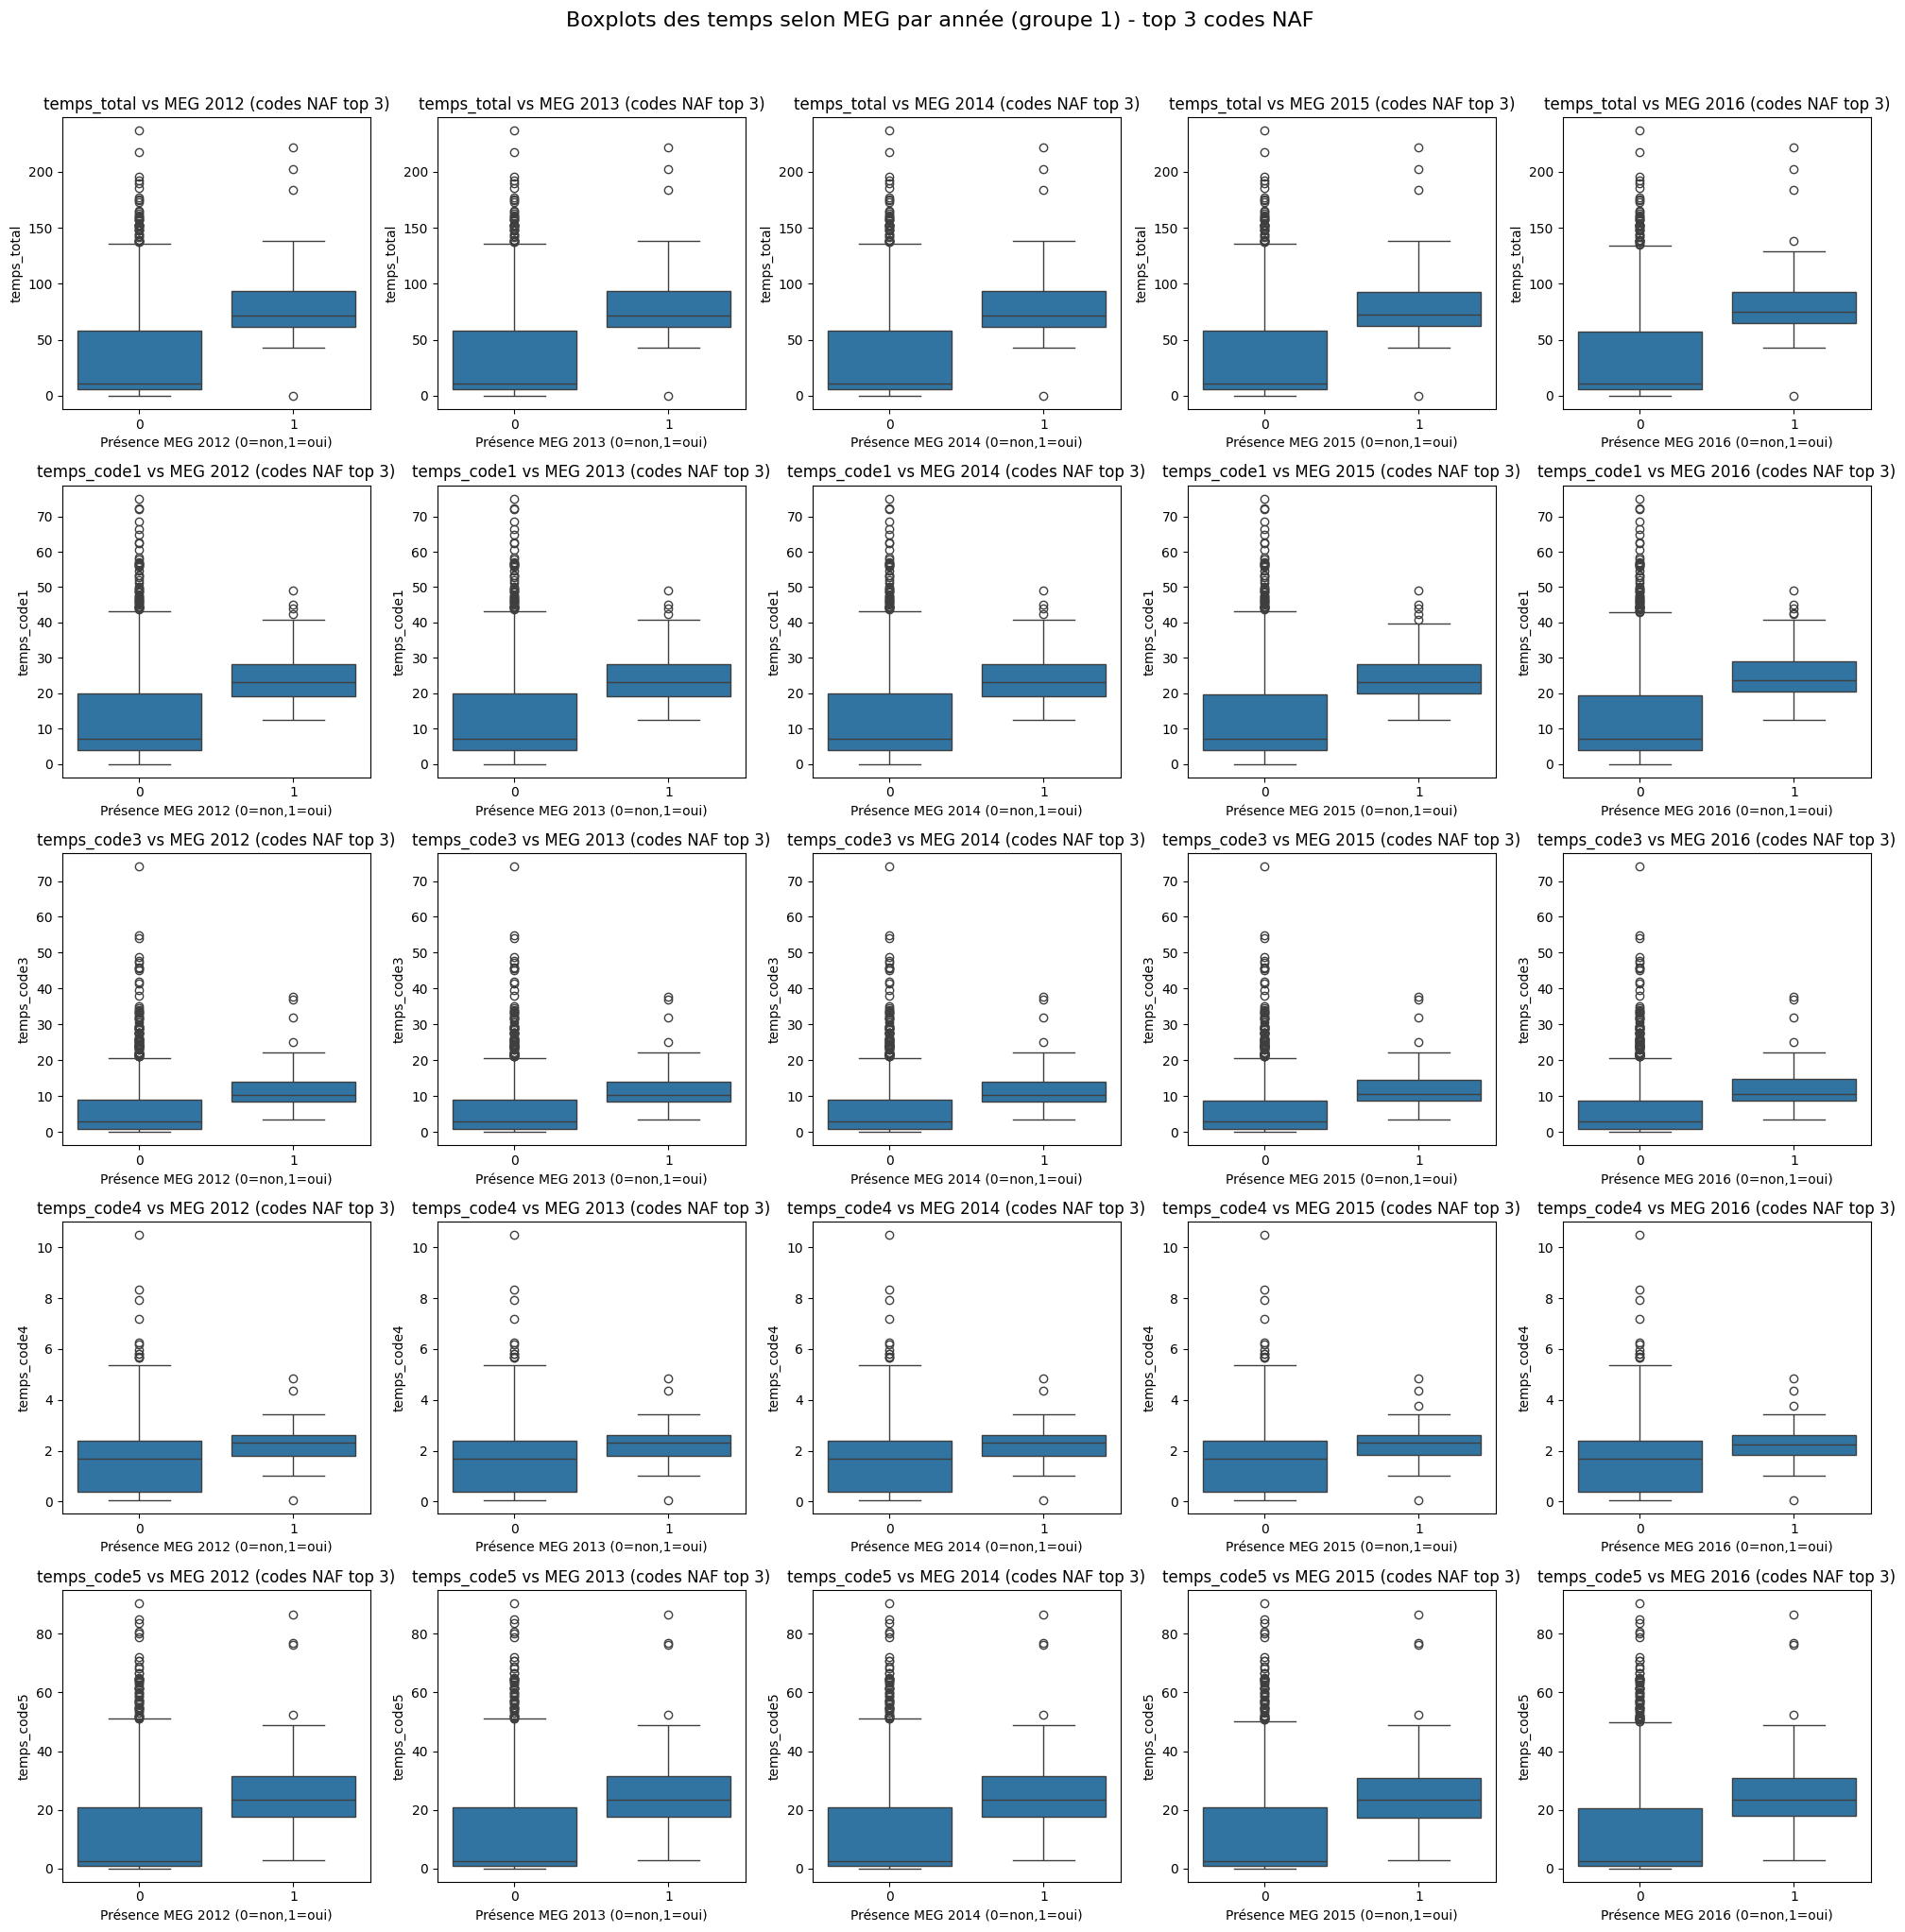

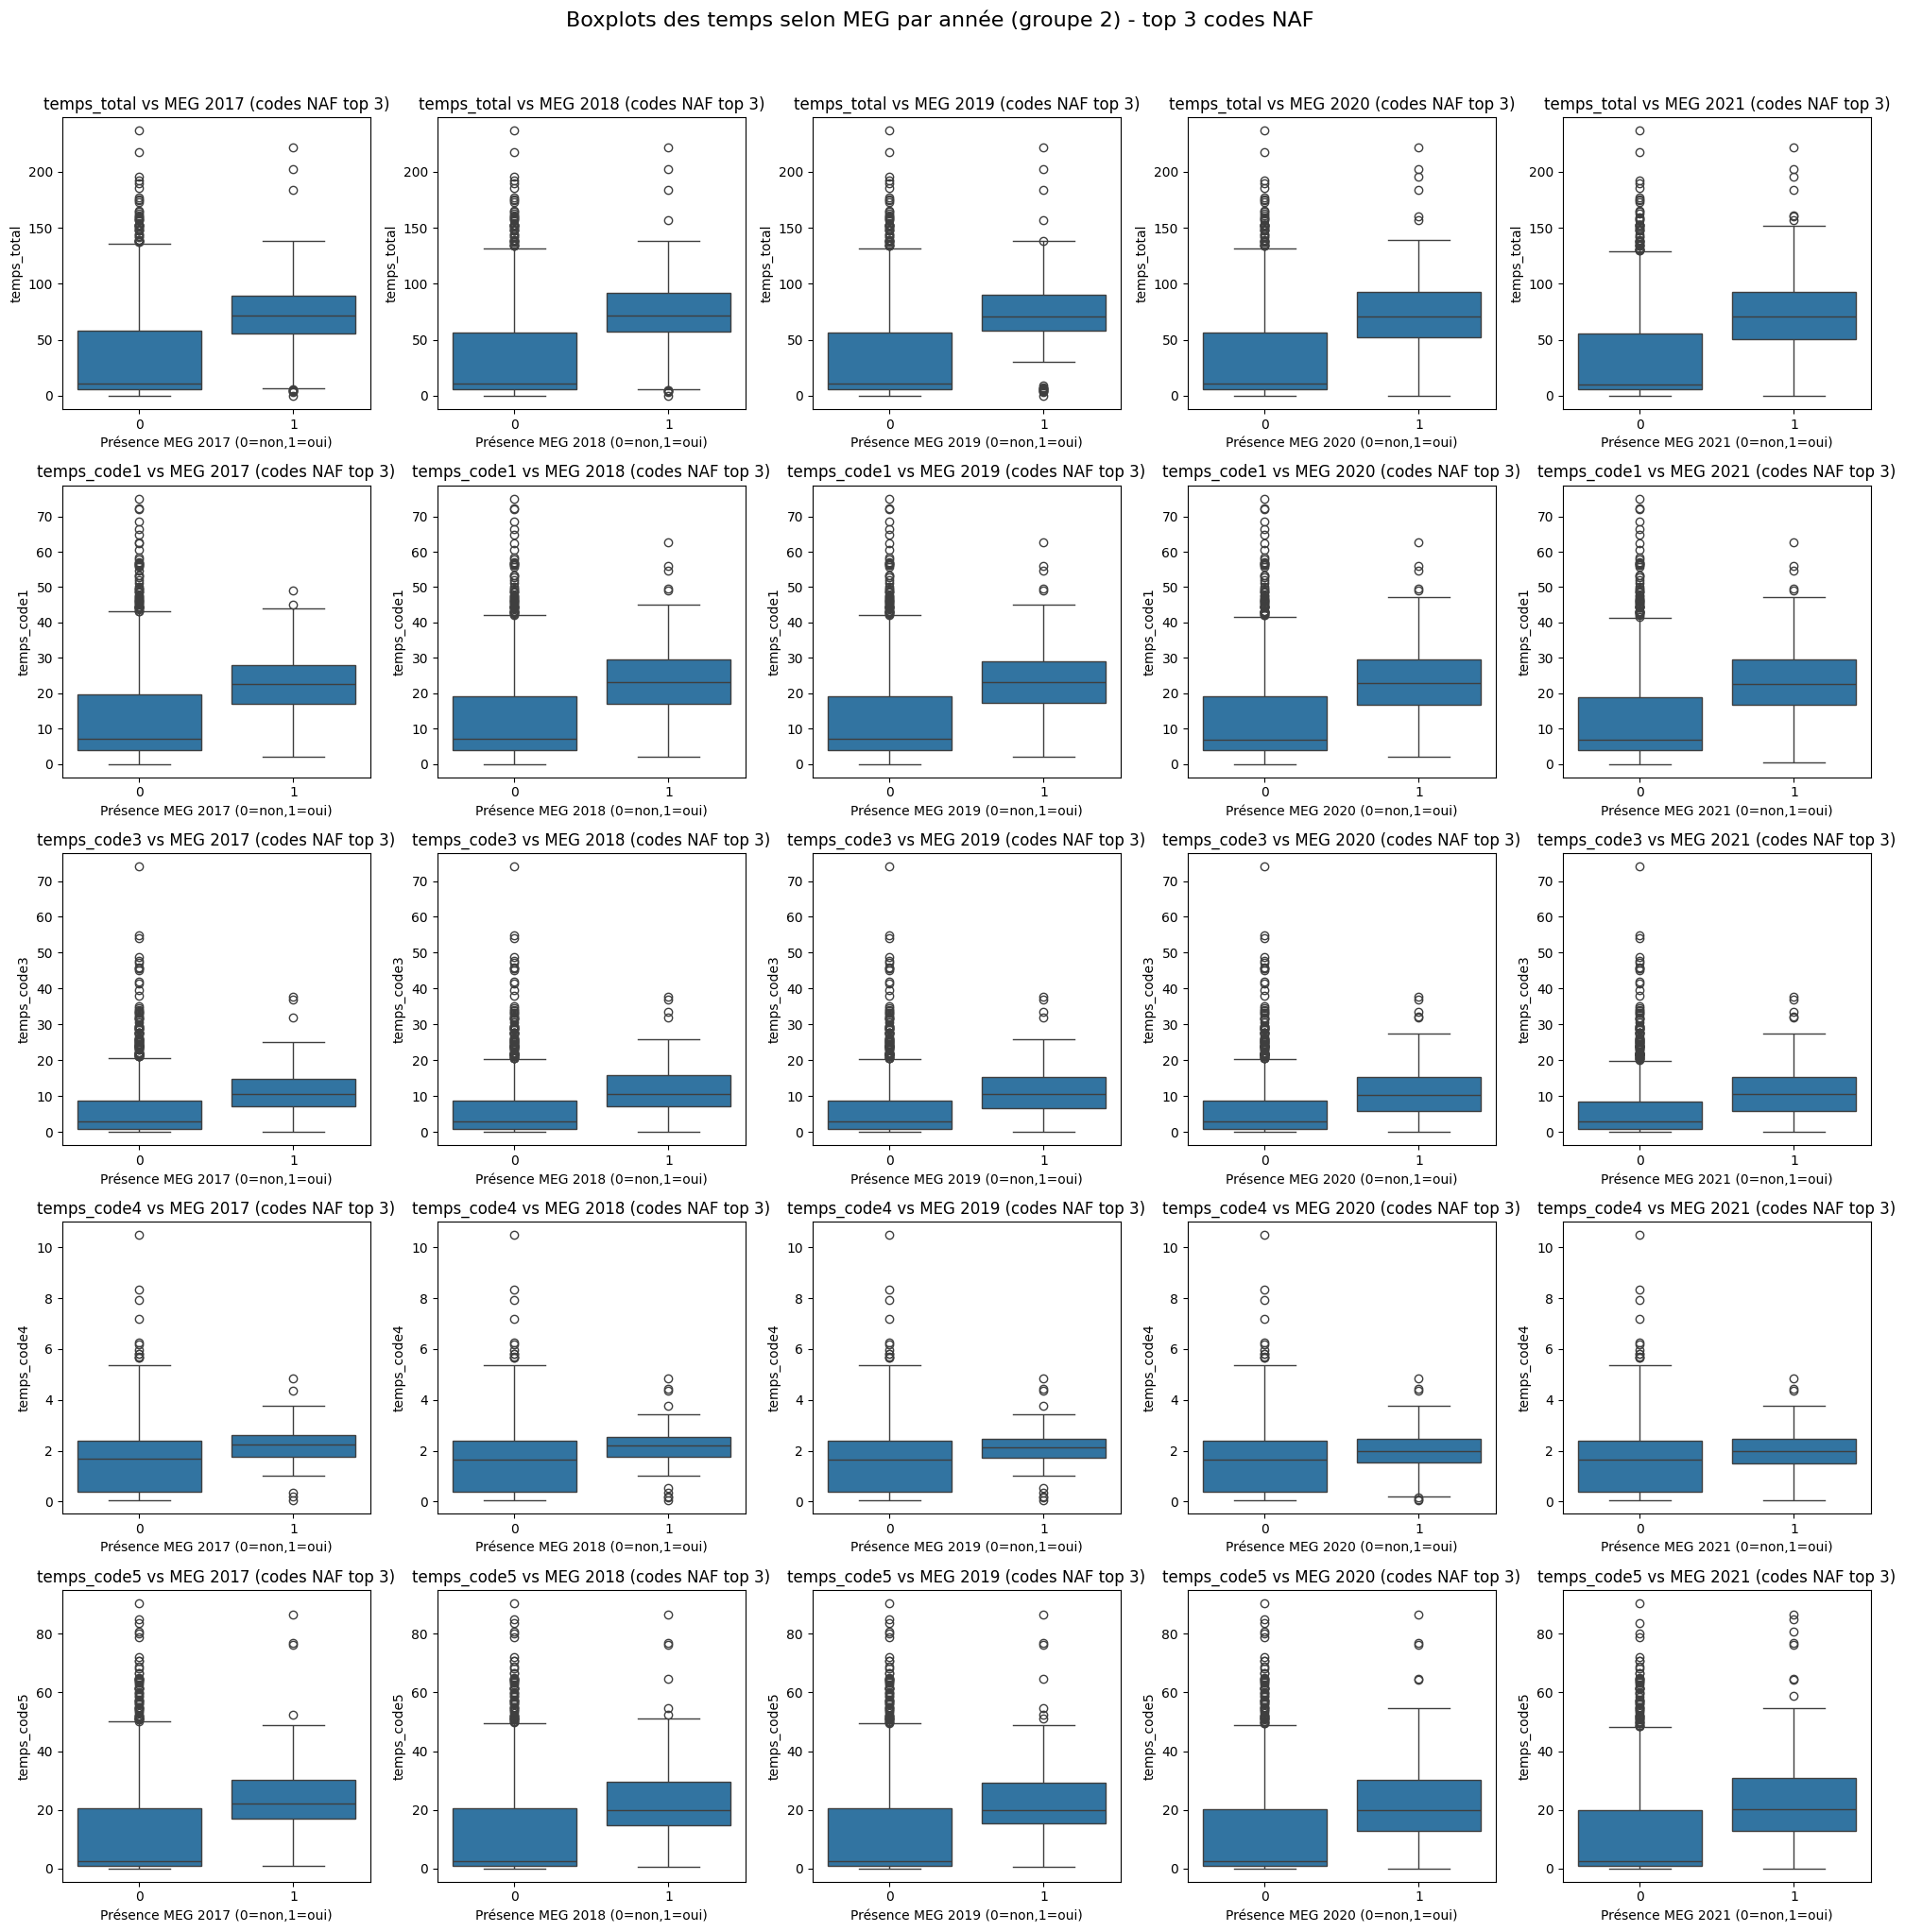

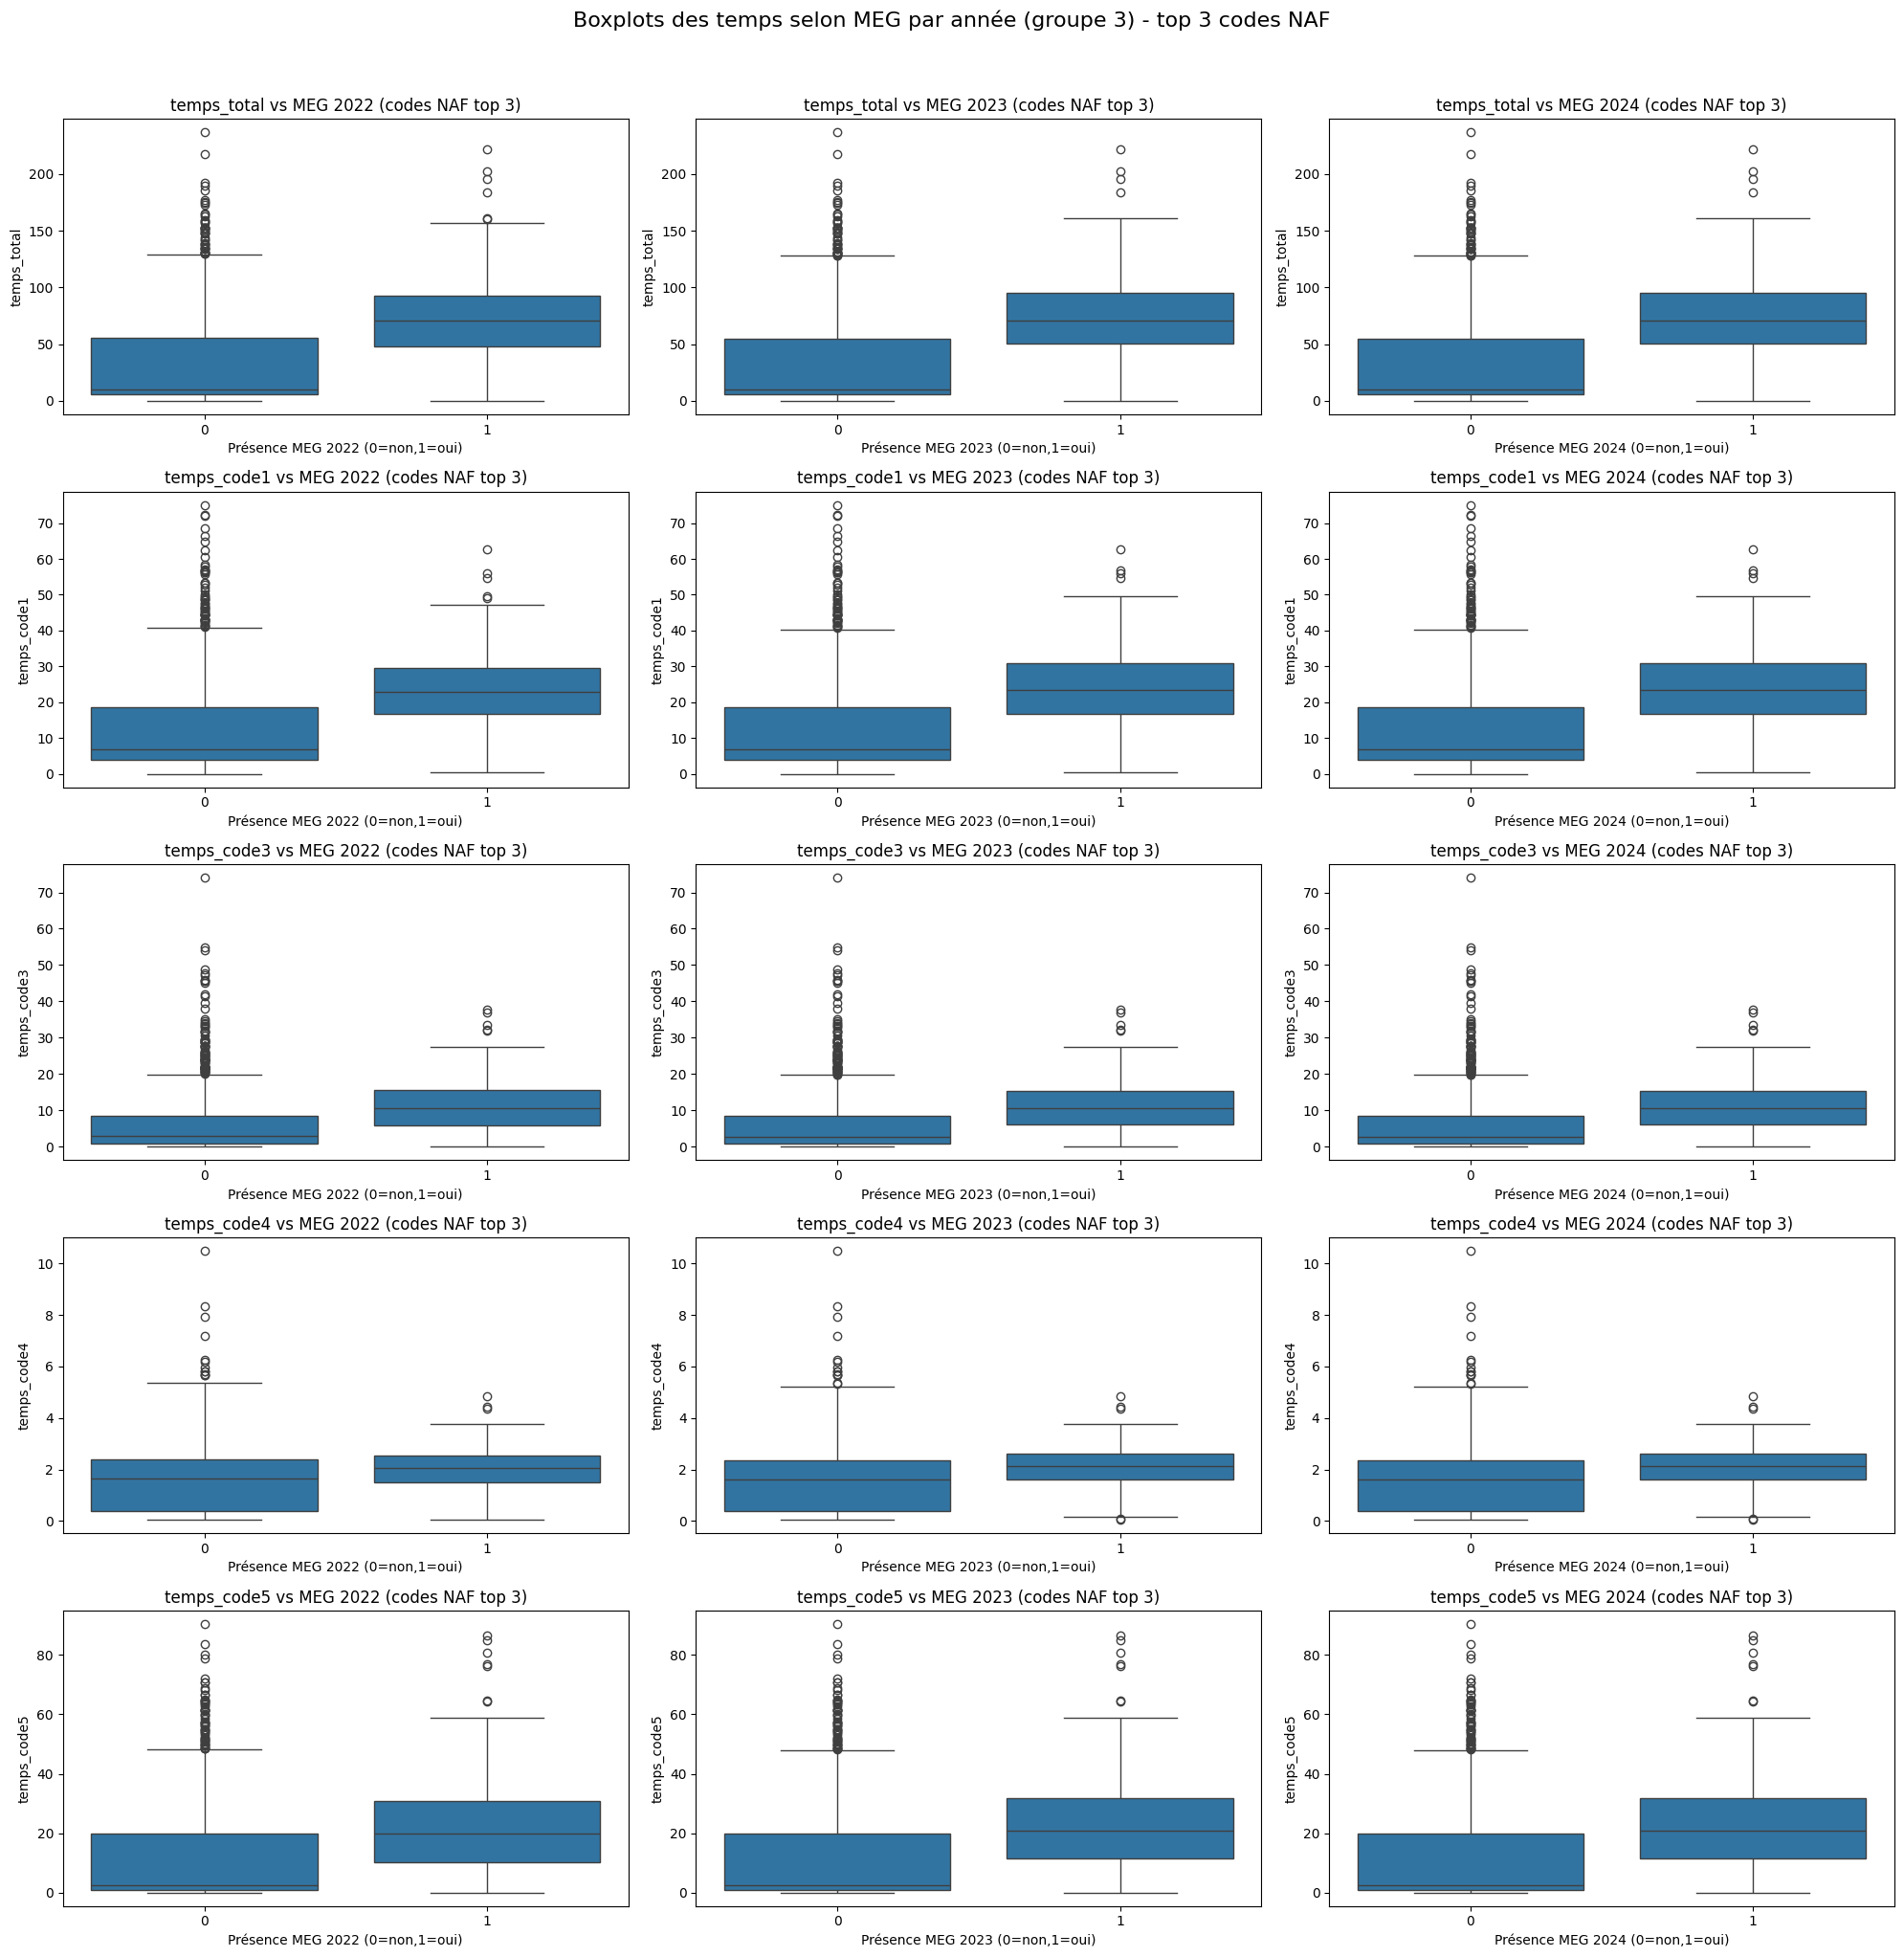

In [22]:
for g, groupe_annees in enumerate(annees_groupes, 1):
    plt.figure(figsize=(20, 4 * n_vars))
    
    for i, temps_var in enumerate(temps_vars):
        for j, annee in enumerate(groupe_annees):
            plt_idx = i * len(groupe_annees) + j + 1
            plt.subplot(n_vars, len(groupe_annees), plt_idx)

            # Filtrer les données où temps_var > 0
            data_plot = df_top_naf[df_top_naf[temps_var] > 0]

            sns.boxplot(x=f'meg_{annee}', y=temps_var, data=data_plot)
            plt.title(f'{temps_var} vs MEG {annee} (codes NAF top 3)')
            plt.xlabel(f'Présence MEG {annee} (0=non,1=oui)')
            plt.ylabel(temps_var)
            plt.tight_layout()
    
    plt.suptitle(f'Boxplots des temps selon MEG par année (groupe {g}) - top 3 codes NAF', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
